# Algorytmy macierzowe - Eliminacja Gaussa i Cholesky’ego dla macierzy rzadkich, Algorytmy permutacji macierzy
## Wykonali: Robert Kazimirek, Paweł Kruczkiewicz


**Numer ćwiczenia: 5**

*Temat:* Wierszowa rzadka eliminacja Gaussa w formacie Coordinate format.

Treść ćwiczenia:
1. Proszę zaimplementować ustaloną z prowadzącym wersję eliminacji Cholesky’ego
lub Gaussa dla macierzy rzadkiej używając ustalonego formatu macierzy rzadkiej
2. Proszę również zaimplementować ustaloną z prowadzącym wersję eliminacji
Cholesky’ego lub Gaussa dla macierzy gęstej<br>
3. 
    1. Proszę zastosować skrypt massmatrix najlepiej w MATLABie do wygenerowania
macierzy massmatrix(0,18,2,0) daje nx=ny=18+2=20 oraz n=20\*20=400 lub
większej, proszę narysować wzór rzadkości macierzy sky(A)<br>
    2. Proszę porównać czasy działania eliminacji rzadkiej i gęstej dla 3a<br>
    3. Proszę porównać zużycie pamięci eliminacji rzadkiej i gęstej dla 3a<br>
4. 
    1. Proszę zastosować skrypt massmatrix najlepiej w MATLABie do wygenerowania
macierzy massmatrix(1,13,3,0) daje nx=ny=13+1+2\*13=40 oraz n=40\*40=1600,
proszę narysować wzór rzadkości macierzy sky(A)<br>
    2. Proszę porównać czasy działania eliminacji rzadkiej i gęstej dla 4a<br>
    3. Proszę porównać zużycie pamięci eliminacji rzadkiej i gęstej dla 4a

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ad. 1

In [2]:
def sparse_elimination(A): 
    n = len(A)
    for k, k_row_vals in enumerate(A):
        akk = k_row_vals[k]
        A[k] = { x: (v/akk if x > k else v) for x, v in k_row_vals.items()}
        for j in range(k+1, n):
            j_row_vals = A[j]
            if k in j_row_vals:
                ajk = j_row_vals[k]
                A[j] = {i: (v - A[k].get(i, 0)*ajk if i > k else v) for i, v in j_row_vals.items()}            

### Ad. 2

In [3]:
def dense_elimination(A):
    n = len(A)
    for k in range(n - 1):
        akk = A[k][k]
        for j in range(k+1, n):
            for i in range(k, n):
                A[j][i] -= A[k][i]*(A[j][k]/akk)

### Ad. 3a
Wygenerowaliśmy dwie macierze za pomocą skryptu w języku C++, stworzonego przez Arkadiusza Wolka. Zostały one przekonwertowane do formatu csv, z którego zostały odczytane. Jedna odpowiada poleceniu massmatrix(0,18,2,0), a druga — massmatrix(0,48,2,0). Ich wielkości to odpowiednio 400x400 oraz 25000x25000.

In [4]:
def get_matrix_from_csv(csv_file):
    return np.loadtxt(open(csv_file, "rb"), delimiter=",", skiprows=0)

In [5]:
A = get_matrix_from_csv("matrix_0_18_2_0.csv")
B = get_matrix_from_csv("matrix_0_48_2_0.csv")

print(A.shape, B.shape)

(400, 400) (2500, 2500)


In [ ]:
print(f"Liczba niezerowych elementów macierzy A: {np.count_nonzero(A)}")
print(f"Procent niezerowych pól macierzy A: {100*np.count_nonzero(A)/(A.shape[0])**2} %")
print()
print(f"Liczba niezerowych elementów macierzy B: {np.count_nonzero(B)}")
print(f"Procent niezerowych pól macierzy B: {100*np.count_nonzero(B)/(B.shape[0])**2} %")

Poniżej przedstawiamy niezerowe pola wejściowych oraz wyjściowe macierzy. Fiolet oznacza niezerową wartość, żółty oznacza zerową.

In [7]:
def spy(matrix, plot):
    mask = matrix == 0
    if matrix.shape[1] == 1:
        plot.set_xticklabels(['', '0', '', '', '', '1'])
        plot.matshow(mask, aspect=0.001)
    else:
        plot.matshow(mask, aspect='auto')

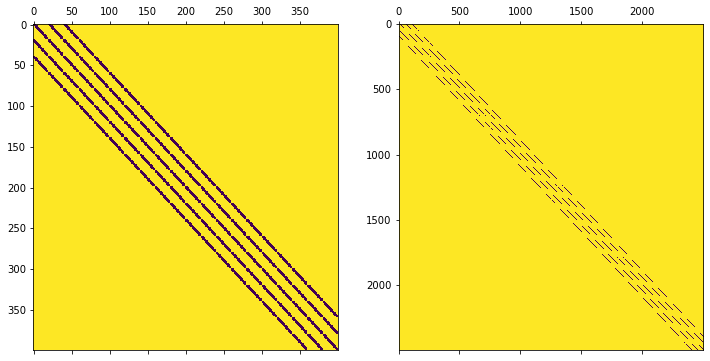

In [8]:
fig, (plot_1, plot_2) = plt.subplots(1, 2, figsize=(12, 6))

spy(A, plot_1)
spy(B, plot_2)

Konwersja do Coordinate format

In [11]:
def matrix_to_coordinates(A):
    x_coords, y_coords = A.nonzero()
    vals = A[x_coords, y_coords]
    return list(zip(vals, x_coords, y_coords))

def coordinates_to_row_coord(coord_matrix):
    n = max([x[2] for x in coord_matrix]) + 1

    row_lists = [{} for _ in range(n)]
    for v, x, y in coord_matrix:
        row_lists[y][x] = v

    return row_lists
        
def matrix_to_row_coord(A):
    A_coord = matrix_to_coordinates(A)
    return coordinates_to_ecsr(A_coord)

In [12]:
A_coord_row = matrix_to_row_coord(A)
B_coord_row = matrix_to_row_coord(B)

### Ad. 3b
Porównanie czasu eliminacji rzadkiej i gęstej dla macierzy z 3a

In [13]:
from time import time

def log_time(func, arg, message):
    number_of_tests = 5
    exec_times = []
    arg_copy = arg.copy()
    for _ in range(number_of_tests):
        t1 = time()
        func(arg_copy)
        t2 = time()
        exec_times.append(round(t2 - t1, 5))
    
    avg_time = round(sum(exec_times)/number_of_tests, 5)
    print(f"{message:8}: {avg_time} [s]")
    return avg_time

In [14]:
sparse_elimination_time = log_time(lambda matrix: sparse_elimination(matrix), A_coord_row, "Czas eliminacji rzadkiej dla macierzy A")
dense_elimination_time = log_time(lambda matrix: dense_elimination(matrix), A, "Czas eliminacji gęstej dla macierzy A")

Czas eliminacji rzadkiej dla macierzy A: 0.40546 [s]
Czas eliminacji gęstej dla macierzy A: 20.81791 [s]


macierz A


<BarContainer object of 2 artists>

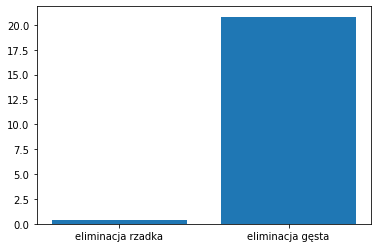

In [15]:
print('macierz A')
plt.bar(['eliminacja rzadka', 'eliminacja gęsta'],
        [sparse_elimination_time, dense_elimination_time])

In [16]:
sparse_elimination_time_B = log_time(lambda matrix: sparse_elimination(matrix), B_coord_row, "Czas eliminacji rzadkiej dla macierzy B")
dense_elimination_time_B = log_time(lambda matrix: dense_elimination(matrix), B, "Czas eliminacji gęstej dla macierzy B")

Czas eliminacji rzadkiej dla macierzy B: 0.66014 [s]


KeyboardInterrupt: 

Niestety, testowanie czasu wykonania mnożenia macierzy po niemal 5 h czekania zostało zatrzymane. Pozostawiono wpis o niej w sprawozdaniu, aby pokazać, jak nieporoporcjonalnie dłuższa jest ta procedura dla klasycznego algorytmu.

### Ad. 3c
W ramach tego zadania liczymy liczbę memopsów dla obu algorytmów.

#### Dla mnożenia macierzy gęstych
Skorzystamy z gotowego wzoru maematycznego, ponieważ był on użyty w poprzednich ćwiczeniach. Łatwiej jest również w tym wypadku podłożyć liczby do wzoru niż uruchamiać tenże wolny algorytm ponownie.

Wzór wygląda następująco: ![Memopsy obliczone](screeny/memop_gesta.png)


Wg powyższego wzoru macirz A wykonuje **21 572 600** zapisów do pamięci, natomiast macierz B potrzebowałaby ich aż **5 217 703 750**

#### Dla mnożenia macierzy rzadkich
Tutaj, ponieważ liczba wykonywanych operacji jest różna w każdej iteracji w zalęzności od tego, ile wartości znajduje się w danym wierszu, zdecydowano się użyć zmodyfikowanej wersji powyższego algorytmu, aby zliczyć wszsytkie zmiany w pamięci potrzebne do wykonania algorytmu.

Uznano (być może nieco mylnie, ale nie zmienia to ostatecznie znacząco wyniku), że każde *dict comprehension* użyte w poniższym algorytmie zużywa 3 * *\[liczba_niezerowych_elem_w_wierszu\]* wpisów do pamięci (2 na przypisanie wartości w pętlach, 1 na zapisanie pary *klucz:wartość*).

In [25]:
def sparse_elimination_printing_memops(A): 
    memop_counter = 0
    
    n = len(A)
    memop_counter += 1
    
    for k, k_row_vals in enumerate(A):
        memop_counter += 2
        
        akk = k_row_vals[k]
        memop_counter += 1
        
        A[k] = { x: (v/akk if x > k else v) for x, v in k_row_vals.items()}
        memop_counter += 3*len(k_row_vals)
        
        for j in range(k+1, n):
            memop_counter += 1
            
            j_row_vals = A[j]
            memop_counter += 1
            
            if k in j_row_vals:
                ajk = j_row_vals[k]
                memop_counter += 1
                
                A[j] = {i: (v - A[k].get(i, 0)*ajk if i > k else v) for i, v in j_row_vals.items()}
                memop_counter += 3*len(j_row_vals)
    
    print(f"Liczba wykonanych operacji na pamięci: {memop_counter}")

Używamy zatem powyższego algorytmu do obliczenia potrzebnej pamieci:

In [27]:
print("Dla macierzy A:")
sparse_elimination_printing_memops(A_coord_row)
print()

print("Dla macierzy B:")
sparse_elimination_printing_memops(B_coord_row)

Dla macierzy A:
Liczba wykonanych operacji na pamięci: 482023

Dla macierzy B:
Liczba wykonanych operacji na pamięci: 8532823


Jak widać, liczba operacji spadła w obu przypadkach o kilka rzędów wielkości. Teraz koszt pamieciowy dla macierzy B jest mniejszy trzykrotnie niz przy klasycznym algorytmie dla macierzy A.

### Ad. 4a
Ponownie wygenerowaliśmy dwie macierze za pomocą skryptu w języku C++, stworzonego przez Arkadiusza Wolka. Ponownie zostały one przekonwertowane do formatu csv, z którego zostały odczytane. Jedna odpowiada poleceniu massmatrix(1,13,3,0), a druga — massmatrix(1,19,3,0). Ich wielkości to odpowiednio 784x784 oraz 1600x1600.

In [17]:
C = get_matrix_from_csv("matrix_1_13_3_0.csv")
D = get_matrix_from_csv("matrix_1_19_3_0.csv")
print(C.shape, D.shape)

(784, 784) (1600, 1600)


In [18]:
print(f"Liczba niezerowych elementów macierzy C: {np.count_nonzero(C)}")
print(f"Procent niezerowych pól macierzy C: {100*np.count_nonzero(C)/(C.shape[0])**2} %")
print()
print(f"Liczba niezerowych elementów macierzy D: {np.count_nonzero(D)}")
print(f"Procent niezerowych pól macierzy D: {100*np.count_nonzero(D)/(D.shape[0])**2} %")

Liczba niezerowych elementów macierzy C: 25600
Procent niezerowych pól macierzy C: 4.164931278633903 %

Liczba niezerowych elementów macierzy D: 53824
Procent niezerowych pól macierzy D: 2.1025 %


Poniżej przedstawiamy niezerowe pola wejściowych oraz wyjściowe macierzy. Fiolet oznacza niezerową wartość, żółty oznacza zerową.

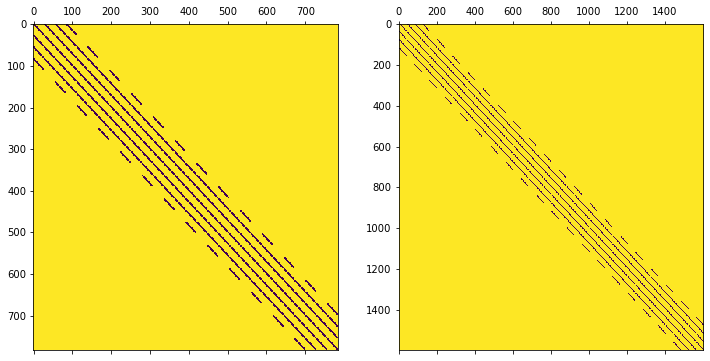

In [20]:
fig, (plot_1, plot_2) = plt.subplots(1, 2, figsize=(12, 6))

spy(C, plot_1)
spy(D, plot_2)

Konwersja do Coordinate format

In [21]:
C_coordinate = matrix_to_row_coord(C)
D_coordinate = matrix_to_row_coord(D)

### Ad. 4b
Porównanie czasu eliminacji rzadkiej i gęstej dla macierzy z 4a

In [23]:
sparse_elimination_time_C = log_time(lambda matrix: sparse_elimination(matrix), C_coordinate, "Czas eliminacji rzadkiej dla macierzy C")
dense_elimination_time_C = log_time(lambda matrix: dense_elimination(matrix), C, "Czas eliminacji gęstej dla macierzy C")

Czas eliminacji rzadkiej dla macierzy C: 0.22462 [s]
Czas eliminacji gęstej dla macierzy C: 124.10446 [s]


macierz C


<BarContainer object of 2 artists>

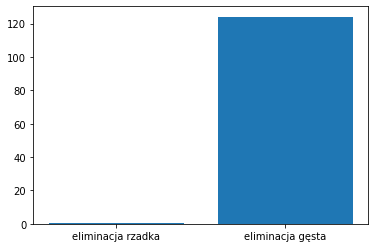

In [24]:
print('macierz C')
plt.bar(['eliminacja rzadka', 'eliminacja gęsta'],
        [sparse_elimination_time_C, dense_elimination_time_C])

In [30]:
sparse_elimination_time = log_time(lambda matrix: sparse_elimination(matrix), D_coordinate, "Czas eliminacji rzadkiej dla macierzy D")
dense_elimination_time = log_time(lambda matrix: dense_elimination(matrix), D, "Czas eliminacji gęstej dla macierzy D")

Czas eliminacji rzadkiej dla macierzy D: 0.55155 [s]


KeyboardInterrupt: 

Niestety, powyżej powtórzyła się sytuacja z punktu 3.

### Ad. 4c
#### Dla macierzy gęstych
Ponownie korzystamy z danego w punkcie 3c wzoru matematycznego.

Macierz C: **161 550 648**

Macierz D: **1 369 170 400**<br>

#### Dla macierzy rzadkich

Znów korzystamy z algorytmu z punktu 3c

In [29]:
print("Dla macierzy C:")
sparse_elimination_printing_memops(C_coordinate)
print()

print("Dla macierzy D:")
sparse_elimination_printing_memops(D_coordinate)

Dla macierzy C:
Liczba wykonanych operacji na pamięci: 1958809

Dla macierzy D:
Liczba wykonanych operacji na pamięci: 5444449


Dla macierzy C liczba operacji pamięciowych zmniejszyła się o 2 rzędy wielkości, a dla D o 3 rzędy wielkości

### Wnioski:

To ćwiczenie pokazało, że wykorzystanie właściwości macierzy pozwala na dokonanie stanowi granicę nie tylko szybkości algorytmu, ale również jego wykonania w ogóle. Algorytm wykorzystujący hashowanie zdecydowanie lepiej radzi sobie pod względem szybkości oraz wykorzystania pamieci.